### LP trees testing

Having a look at declustring trees and Lund Jet Planes.

In [8]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import uproot3 as uproot
import awkward as ak
import networkx as nx
from IPython.display import Image

In [2]:
#!ls /eos/user/a/asopio/lundNtuples_20231403/

In [28]:
sample_type = "w" 
# sample_type = "qcd"
# sample_type = "top"

fn = "/eos/user/z/zehui/flatmass_train.root"

# if sample_type=="w":
#     fn = '/eos/user/z/zehui/lundNtuples/user.asopio.grid_wprime_trees_ufosd.426347.Pythia8EvtGen_A14NNPDF23LO_WprimeWZ_flatpT_ANALYSIS.root/user.asopio.24603642._000001.ANALYSIS.root'
# elif sample_type=="top":    
#     fn = '/eos/user/z/zehui/lundNtuples/user.asopio.grid_zprime_trees_ufosd.426345.Pythia8EvtGen_A14NNPDF23LO_Zprime_tt_flatpT_ANALYSIS.root/user.asopio.24603668._000005.ANALYSIS.root'
# elif sample_type=="qcd":
#     fn = '/eos/user/z/zehui/lundNtuples/user.asopio.grid_dijet_trees_ufosd.364706.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ6WithSW_ANALYSIS.root/user.asopio.24603630._000002.ANALYSIS.root'

# f = uproot.open(fn)
# rt_tree=f['lundjets_InDetTrackParticles']

In [29]:
#Now using uproot to read the file, just like it's done in the tagger training code
f = uproot.open(fn)
# rt_tree=f['lundjets_InDetTrackParticles']
rt_tree=f['outtree']

In [30]:
# jet_collection = 'Akt10UFOJet'
jet_collection = 'Akt10TruthJet'

brlist = [
 '{}_jetM'.format(jet_collection),
 '{}_jetPt'.format(jet_collection),
 '{}_jetLundDeltaR'.format(jet_collection),
 '{}_jetLundPt1'.format(jet_collection),
 '{}_jetLundPt2'.format(jet_collection),
 '{}_jetLundZ'.format(jet_collection),
 '{}_jetLundKt'.format(jet_collection),
 '{}_jetLundVarPhi'.format(jet_collection),
 '{}_jetLundEta'.format(jet_collection),
 '{}_jetLundE'.format(jet_collection),
 '{}_jetLundIDParent1'.format(jet_collection),
 '{}_jetLundIDParent2'.format(jet_collection),
 '{}_jetDrWboson'.format(jet_collection),
 '{}_jetDrZboson'.format(jet_collection),
 'DSID']

# # print("Converting ROOT tree branches to numpy arrays...")
# # brdict = rdf.AsNumpy(brlist)

branch_arrs = rt_tree.arrays( brlist )

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward0/array/base.py:382: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return issubclass(x, cls.numpy.integer) and not issubclass(x, (cls.numpy.bool_, cls.numpy.bool))
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward0/array/base.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy

In [31]:
# jet_collection = 'Akt10UFOJet'
jet_collection = 'Akt10TruthJet'

#Read the root file using uproot as is done in the tagger training code
p1s = ak.firsts( branch_arrs[str.encode('{}_jetLundIDParent1'.format(jet_collection))] )
p2s = ak.firsts( branch_arrs[str.encode('{}_jetLundIDParent2'.format(jet_collection))] )
p1pts = ak.firsts( branch_arrs[str.encode('{}_jetLundPt1'.format(jet_collection))] )
p2pts = ak.firsts( branch_arrs[str.encode('{}_jetLundPt2'.format(jet_collection))] )
lund_zs = ak.firsts( branch_arrs[str.encode('{}_jetLundZ'.format(jet_collection))] )
lund_drs = ak.firsts( branch_arrs[str.encode('{}_jetLundDeltaR'.format(jet_collection))] )
lund_kts = ak.firsts( branch_arrs[str.encode('{}_jetLundKt'.format(jet_collection))] )
dr_w_boson= ak.firsts( branch_arrs[str.encode('{}_jetDrWboson'.format(jet_collection))] )
dr_z_boson= ak.firsts( branch_arrs[str.encode('{}_jetDrZboson'.format(jet_collection))] )

jet_ms = ak.firsts( branch_arrs[str.encode('{}_jetM'.format(jet_collection))] ) / 1e3 #convert to GeV for convenience
jet_pts = ak.firsts( branch_arrs[str.encode('{}_jetPt'.format(jet_collection))] ) / 1e3 
dsids = branch_arrs[b'DSID']

In [32]:
#Old way of reading the root file

# p1s = []
# p2s = []
# p1pts = []
# p2pts = []
# lund_zs = []
# lund_drs = []
# lund_kts = []

# jet_ms = []
# jet_pts = []

# njets = len(brdict['{}_jetLundIDParent1'.format(jet_collection)])

# for ijet in range(njets):
#     if len(brdict['{}_jetLundIDParent1'.format(jet_collection)])<0:
#         continue
    
#     if ijet%100==0:
#         print("Making numpy arrays for jet {}/{}".format(ijet,njets), end='\r')
    
#     p1s.append( np.array(brdict['{}_jetLundIDParent1'.format(jet_collection)][ijet][0]) )
#     p2s.append( np.array(brdict['{}_jetLundIDParent2'.format(jet_collection)][ijet][0]) )

#     p1pts.append( np.array(brdict['{}_jetLundPt1'.format(jet_collection)][ijet][0]) )
#     p2pts.append( np.array(brdict['{}_jetLundPt2'.format(jet_collection)][ijet][0]) )

#     lund_zs.append( np.array(brdict['{}_jetLundZ'.format(jet_collection)][ijet][0]) )
#     lund_drs.append( np.array(brdict['{}_jetLundDeltaR'.format(jet_collection)][ijet][0]) )
#     lund_kts.append( np.array(brdict['{}_jetLundKt'.format(jet_collection)][ijet][0]) )
    
#     jet_ms.append( brdict['{}_jetM'.format(jet_collection)][ijet][0] )
#     jet_pts.append( brdict['{}_jetPt'.format(jet_collection)][ijet][0] )

In [33]:
#Select signal / background using the DSID variable and mass
is_signal = (( dsids < 1 ) | (dsids > 370000)) & ( dr_w_boson < 0.1 ) & (dr_z_boson > 1.0 )
is_bg= (~is_signal) & (dr_z_boson > 1.0)

sig_jet_ms = jet_ms[ is_signal ]
bkg_jet_ms = jet_ms[ is_bg ]
sig_jet_pts = jet_pts[ is_signal ]
bkg_jet_pts = jet_pts[ is_bg ]

Text(0, 0.5, 'Number of jets')

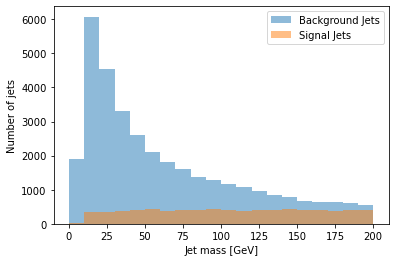

In [34]:
#Plot the jet mass and jet pt distributions
kws = {
    'bins':20,
    'range':[0,200],
    'alpha': 0.5,
}
plt.hist(bkg_jet_ms, label="Background Jets", **kws)
plt.hist(sig_jet_ms, label="Signal Jets", **kws)

plt.legend()
plt.xlabel('Jet mass [GeV]')
plt.ylabel('Number of jets')

Text(0, 0.5, 'Number of jets')

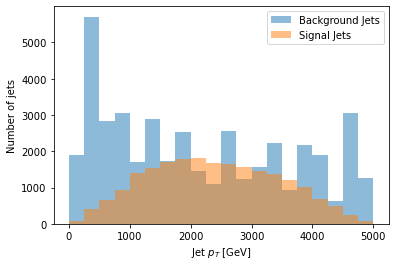

In [35]:
kws = {
    'bins':20,
    'range':[0,5000],
    'alpha': 0.5,
}
plt.hist(bkg_jet_pts, label="Background Jets", **kws)
plt.hist(sig_jet_pts, label="Signal Jets", **kws)

plt.legend()
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('Number of jets')

In [36]:
#Print the index in the file of the largest graphs. These might be interesting to check out when plotting the jet graphs...
lmax = 0
imax = 0

largest_graphs_is = []
largest_graphs_ls = []

for i in range(len(p1s)):
    
    l = len(p1s[i])
    
    if l > lmax:
        lmax = l
        imax = i
        
        if l > 200:
            largest_graphs_is.append(i)
            largest_graphs_ls.append(l)
        
lmax,imax

(347, 24319)

Text(0, 0.5, 'Number of jets')

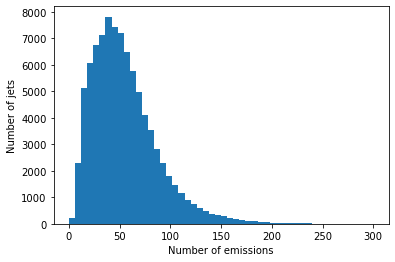

In [37]:
#Plot the distributions of declustering lengths
tree_lengths = [ len(p1) for p1 in p1s ]
plt.hist(tree_lengths, bins=50, range=[0,300])
plt.xlabel('Number of emissions')
plt.ylabel('Number of jets')

In [38]:
def get_primary_indices( parents1, parents2, parent1pts, parent2pts ):
    """
    Function for getting the indices at which the primary lund jet plane variables are located.
    """
    primary_lp_indices = []
    
    i_node = 0
    node_has_parents = True

    while node_has_parents:

        primary_lp_indices.append(i_node)

        idp1 = parents1[i_node]
        idp2 = parents2[i_node]

        #No idea why this happens sometimes! --but it does!
        if idp1 == i_node or idp2 == i_node:
#             print("Warning! node {} is parented to itself".format(i_node))
            break

        node_has_parents = (idp1 != -1) or (idp2 != -1)

        i_node = idp1 
        
        p1pt = parent1pts[idp1] if idp1 != -1 else 0 
        p2pt = parent2pts[idp2] if idp2 != -1 else 0

        i_node = idp1 if p1pt > p2pt else idp2
    
    
    return primary_lp_indices

In [39]:
evt_index = 2

# lp1s = ak.to_numpy( p1s[evt_index] )
# lp2s = ak.to_numpy( p2s[evt_index] )
# lp1pts = ak.to_numpy( p1pts[evt_index] )
# lp2pts = ak.to_numpy( p2pts[evt_index] )

lp1s = p1s[ is_signal ][evt_index]
lp2s = p2s[ is_signal ][evt_index]
lp1pts = p1pts[ is_signal ][evt_index]
lp2pts = p2pts[ is_signal ][evt_index]
lpzs = lund_zs[ is_signal ][evt_index]
lpdrs = lund_drs[ is_signal ][evt_index]
lpkts = np.log10( lund_kts[ is_signal ][evt_index] )

parent_indices = np.array([ lp1s, lp2s ]).T
print('Number of nodes = ',len(parent_indices))

Number of nodes =  80


In [40]:
g2 = nx.Graph()
g2.add_nodes_from(np.arange(len(parent_indices)))
for i in range(len(parent_indices)):
    iparents = parent_indices[i]
    for ip in iparents:
        if ip != -1:
            g2.add_edge( i, ip)    

In [41]:
primary_lp_indices = get_primary_indices( lp1s, lp2s, lp1pts, lp2pts )
prim_lp_edges = [ e for ie,e in enumerate(g2.edges) if e[0] in primary_lp_indices and e[1] in primary_lp_indices ]

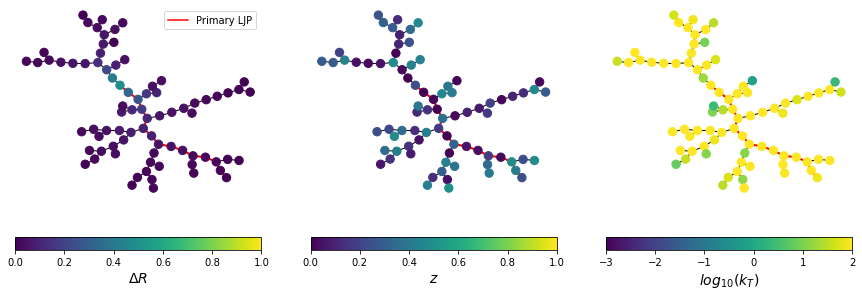

In [42]:
#Plot the declustering trees, showing the variables from which the primary lund jet plane is built as a path through the tree
dr_lim = [ 0, 1 ]
z_lim = [ 0, 1 ]
kt_lim = [ -3, 2 ]

draw_node_labels=False

fig,ax = plt.subplots(1,3,figsize=[15,5])

cmap=plt.cm.viridis

nx.draw_kamada_kawai(g2, ax=ax[0], with_labels=draw_node_labels, font_weight='bold', node_size=70, node_color=lpdrs, cmap=cmap, 
                     vmin=dr_lim[0], vmax=dr_lim[1])

nx.draw_kamada_kawai(g2, ax=ax[1], with_labels=draw_node_labels, font_weight='bold', node_size=70, node_color=lpzs, cmap=cmap, 
                     vmin=z_lim[0], vmax=z_lim[1])

nx.draw_kamada_kawai(g2, ax=ax[2], with_labels=draw_node_labels, font_weight='bold', node_size=70, node_color=lpkts, cmap=cmap, 
                     vmin=kt_lim[0], vmax=kt_lim[1])

for axi in ax:
    nx.draw_kamada_kawai(g2, ax=axi, with_labels=draw_node_labels, nodelist=primary_lp_indices, edgelist=prim_lp_edges,
                         font_weight='bold', node_size=0, node_color='red', width=2, arrows=True, edge_color='red')


sm_dr = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=dr_lim[0], vmax=dr_lim[1]))
sm_z = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=z_lim[0], vmax=z_lim[1]))
sm_kt = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=kt_lim[0], vmax=kt_lim[1]))

c_dr = plt.colorbar(sm_dr, location='bottom', ax=ax[0])
c_dr.set_label('$\Delta R$',size=14)
c_z = plt.colorbar(sm_z, location='bottom', ax=ax[1])
c_z.set_label('$z$',size=14)
c_kt = plt.colorbar(sm_kt, location='bottom', ax=ax[2])
c_kt.set_label('$log_{10}(k_T)$',size=14)

ax[0].plot( [], [], c='red', label='Primary LJP')
ax[0].legend()

fig.show()
for fext in ['png','pdf']:
    plt.savefig("ljp_drzkt_graphs_{}.{}".format(sample_type,fext))

In [43]:
#Loop over all the entries and fill histograms of lund jet planes
nbinsx = 20
nbinsy = 20
log_dr_lims = [0,10] 
log_z_lims = [0,10]

h_ljp_prim = ROOT.TH2D('ljp','Primary Lund Jet Plane',nbinsx,*log_dr_lims,nbinsx,*log_z_lims)
h_ljp_all = ROOT.TH2D('ljp','All-order Lund Jet Plane',nbinsx,*log_dr_lims,nbinsx,*log_z_lims)

maxjets = 10000
njets = min( len(lund_zs), maxjets )

for ievt in range(njets):
    if ievt%1000==0:
        print("Filling Lund Plane Histograms for jet {}/{}".format(ievt,njets),end='\r')
    
    jet_dr = np.array( lund_drs[ is_signal ][ievt], dtype=np.float64)
    jet_z = np.array( lund_zs[ is_signal ][ievt], dtype=np.float64)

    lp_p1 = np.array( p1s[ is_signal ][ievt] )
    lp_p2 = np.array( p2s[ is_signal ][ievt] )
    lp_p1pt = np.array( p1pts[ is_signal ][ievt] )
    lp_p2pt = np.array( p2pts[ is_signal ][ievt] )
    
    if len(lp_p1) == 0: continue
    
    primary_lp_indices = get_primary_indices( lp_p1, lp_p2, lp_p1pt, lp_p2pt )
    
    jet_dr_prim = jet_dr[primary_lp_indices]
    jet_z_prim = jet_z[primary_lp_indices]
    
    nlpentries_all = len(jet_dr)
    nlpentries_prim = len(jet_dr_prim)

    h_ljp_prim.FillN(nlpentries_prim, -np.log(jet_dr_prim), -np.log(jet_z_prim), np.ones(nlpentries_prim,dtype=np.float64))
    h_ljp_all.FillN(nlpentries_all, -np.log(jet_dr), -np.log(jet_z), np.ones(nlpentries_all,dtype=np.float64))


#Normalise plots by total number of jets and bin area to get the differential shape of the LJP
bin_area = ((log_dr_lims[1]-log_dr_lims[0])/nbinsx) * ((log_z_lims[1]-log_z_lims[0])/nbinsy)
h_ljp_all.Scale( 1.0 / ( njets * bin_area ) )
h_ljp_prim.Scale( 1.0 / ( njets * bin_area ) )

Warning in <TROOT::Append>: Replacing existing TH1: ljp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ljp (Potential memory leak).


In [44]:
#Plot the Lund Jet Plane 2d historgam using ROOT plotting functions
ROOT.gStyle.SetOptStat(0)

def plot_lund_plane_root(name, histo):
    """
    Function for plotting lund planes using ROOT plotting functions. 
     - name : name of ouput plot
     - histo : name of input histogram (type ROOT.TH2D)
    """
    
    c=ROOT.TCanvas('c','c',600,600)

    ROOT.gPad.SetRightMargin(0.18)
    palette = histo.GetListOfFunctions().FindObject("palette")
    if type(palette)==ROOT.TPaletteAxis:
        palette.SetX1NDC(0.83)
        palette.SetX2NDC(0.865)

    histo.Draw('colz')
    histo.GetXaxis().SetTitle("ln(#it{R/#DeltaR})")
    histo.GetYaxis().SetTitle("ln(#it{1/z})")
    histo.GetZaxis().SetTitle("#frac{1}{#it{N_{jets}}} #frac{d #it{N_{emissions}}}{d ln(#it{R/#DeltaR}) d ln(#it{1/z})}")
    histo.GetZaxis().SetTitleOffset(1.6)

    for fext in ['png','pdf']:
        c.Print("{}.{}".format(name,fext))
    
plot_lund_plane_root( 'primary_ljp_{}'.format(sample_type), h_ljp_prim )
plot_lund_plane_root( 'allorder_ljp_{}'.format(sample_type), h_ljp_all )

Info in <TCanvas::Print>: png file primary_ljp_w.png has been created
Info in <TCanvas::Print>: pdf file primary_ljp_w.pdf has been created
Info in <TCanvas::Print>: png file allorder_ljp_w.png has been created
Info in <TCanvas::Print>: pdf file allorder_ljp_w.pdf has been created


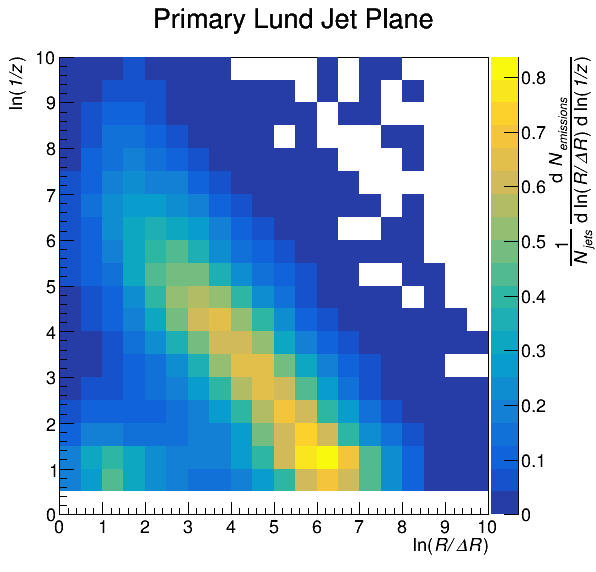

In [45]:
Image('primary_ljp_{}.png'.format(sample_type))

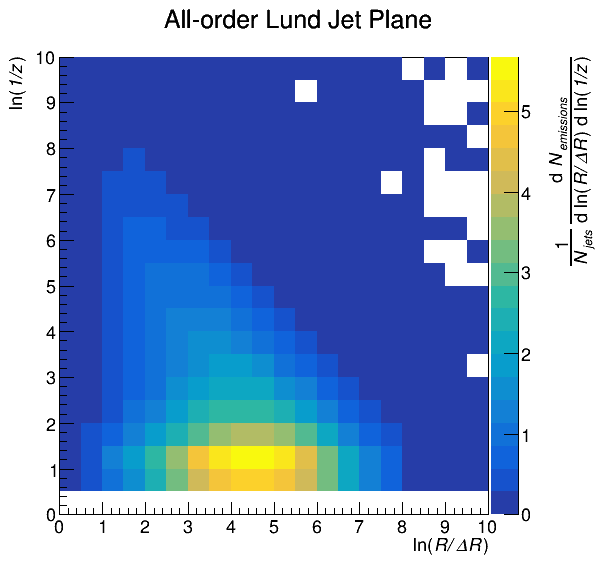

In [46]:
Image('allorder_ljp_{}.png'.format(sample_type))